################################
Loading : C:/VKHCG/02-Krennwallner/02-Assess/01-EDS/02-Python/Assess-DE-Billboard-Visitor.csv
################################
################################
  BillboardCountry BillboardPlaceName  BillboardLatitude  BillboardLongitude  \
0               DE               Lake            51.7833              8.5667   
1               DE               Horb            48.4333              8.6833   
2               DE               Horb            48.4333              8.6833   
3               DE               Horb            48.4333              8.6833   
4               DE               Horb            48.4333              8.6833   

  VisitorCountry VisitorPlaceName  VisitorLatitude  VisitorLongitude  \
0             DE             Lake          51.7833            8.5667   
1             DE             Horb          48.4333            8.6833   
2             DE             Horb          48.4333            8.6833   
3             DE             Horb     

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


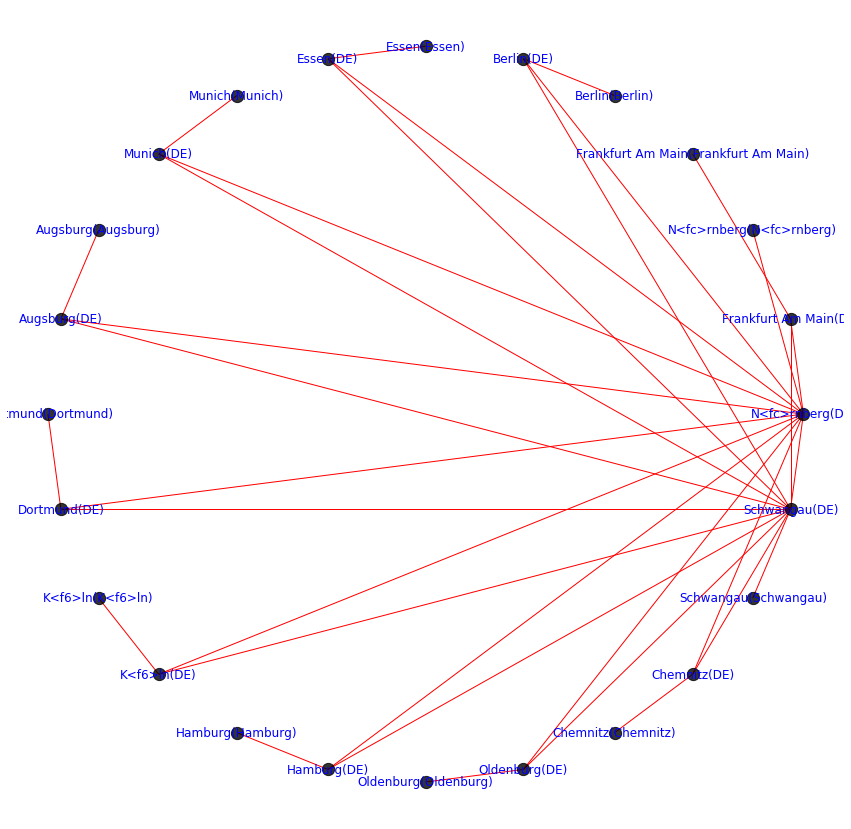

################################
### Done!! #####################
################################


In [10]:
import sys 
import os
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np
pd.options.mode.chained_assignment = None 

sInputFileName='C:/VKHCG/02-Krennwallner/02-Assess/01-EDS/02-Python/Assess-DE-Billboard-Visitor.csv' 
sOutputFileName1='C:/VKHCG/02-Krennwallner/05-Organise/01-EDS/02-Python/Organise-Billboards.gml' 
sOutputFileName2='C:/VKHCG/02-Krennwallner/05-Organise/01-EDS/02-Python/Organise-Billboards.png' 

### Import Company Data ################################################################
sFileName=sInputFileName 
print('------------------------------------')
print('Loading :',sFileName) 
print('-------------------------------------------')
BillboardDataRaw=pd.read_csv(sFileName,header=0,low_memory=False, encoding="latin-1") 
print('--------------------------------------------') 
################################################################
print(BillboardDataRaw.head()) 
print(BillboardDataRaw.shape) 
BillboardData=BillboardDataRaw 
sSample=list(np.random.choice(BillboardData.shape[0],20))
###############################################################
G=nx.Graph() 
for i in sSample:
    for j in sSample:
        Node0=BillboardData['BillboardPlaceName'][i] + '('+ BillboardData['BillboardCountry'][i] + ')' 
        Node1=BillboardData['BillboardPlaceName'][j] + '('+ BillboardData['BillboardCountry'][i] + ')' 
        if Node0 != Node1:
            G.add_edge(Node0,Node1)
            for i in sSample:
                Node0=BillboardData['BillboardPlaceName'][i] + '('+ BillboardData['VisitorPlaceName'][i] + ')' 
                Node1=BillboardData['BillboardPlaceName'][i] + '('+ BillboardData['VisitorCountry'][i] + ')'
                if Node0 != Node1: 
                    G.add_edge(Node0,Node1)

print('Nodes:', G.number_of_nodes()) 
print('Edges:', G.number_of_edges())
################################################################
sFileName=sOutputFileName1
print('-----------------------------------------')
print('Storing :',sFileName) 
print('-----------------------------------------')
nx.write_gml(G, sFileName) 
################################################################
sFileName=sOutputFileName2 
print('------------------------------------------')
print('Storing Graph Image:',sFileName) 
print('------------------------------------------')
plt.figure(figsize=(15, 15)) 
pos=nx.circular_layout(G,dim=2)
nx.draw_networkx_nodes(G,pos, node_color='k', node_size=150, alpha=0.8) 
nx.draw_networkx_edges(G, pos,edge_color='r', arrows=False, style='solid') 
nx.draw_networkx_labels(G,pos,font_size=12,font_family='sans-serif',font_color='b') 
plt.axis('off')
plt.savefig(sFileName,dpi=600) 
plt.show()
print('-------------------------------------------')
print('----- Done!! ----------------------------') 
